In [12]:
import pandas as pd
import os
model="effnet_clam"
#model="resnet_clam"
path="20250306_214712_p6_b50"
# Load the CSV
train_df = pd.read_csv(os.path.join("F:/logs",model,path,"train_log.csv"))
val_df = pd.read_csv(os.path.join("F:/logs",model,path,"validation_log.csv"))

train_df.head()

,epoch,loss,instance_loss,accuracy,macro_f1,weighted_f1,qwk,class0,class1,class2,class3,class4,class5
0,0,1.114354,0.067702,0.553886,0.466019,0.534645,0.718118,0.826904,0.592211,0.246707,0.214286,0.354167,0.539823
1,1,0.938081,0.017433,0.617661,0.541955,0.604013,0.807031,0.860914,0.646621,0.319760,0.285714,0.484722,0.625369
2,2,0.873446,0.015115,0.657673,0.592492,0.646863,0.831883,0.879188,0.679840,0.374850,0.362369,0.541667,0.678466
3,3,0.820880,0.014461,0.669477,0.604994,0.660226,0.849190,0.885787,0.691294,0.392814,0.374564,0.558333,0.693215
4,4,0.773429,0.015041,0.696765,0.636376,0.688526,0.872090,0.903046,0.720504,0.429940,0.430314,0.588889,0.705015


In [13]:
val_df.head()

,epoch,loss,instance_loss,accuracy,macro_f1,weighted_f1,qwk,class0,class1,class2,class3,class4,class5
0,0,0.885421,0.017862,0.641937,0.538696,0.614830,0.843095,0.881526,0.647482,0.351351,0.327044,0.177914,0.918660
1,1,0.903540,0.012756,0.654200,0.575136,0.642203,0.855227,0.825301,0.755396,0.437838,0.188679,0.466258,0.736842
2,2,0.836449,0.017548,0.678112,0.615399,0.671376,0.872307,0.811245,0.815348,0.313514,0.528302,0.453988,0.698565
3,3,0.795246,0.013775,0.695279,0.626921,0.681689,0.879212,0.911647,0.738609,0.275676,0.459119,0.631902,0.693780
4,4,0.772337,0.013619,0.704476,0.637839,0.692605,0.890860,0.937751,0.697842,0.335135,0.421384,0.687117,0.717703


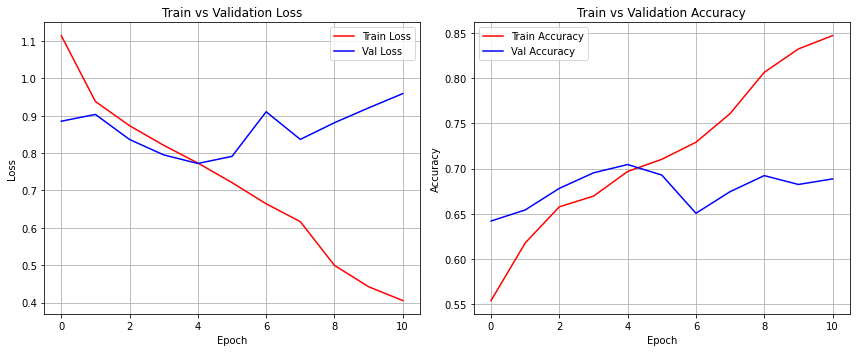

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss
axes[0].plot(train_df["epoch"], train_df["loss"], label="Train Loss", color="red")
axes[0].plot(val_df["epoch"], val_df["loss"], label="Val Loss", color="blue")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Train vs Validation Loss")
axes[0].legend()
axes[0].grid()

# Plot Accuracy
axes[1].plot(train_df["epoch"], train_df["accuracy"], label="Train Accuracy", color="red")
axes[1].plot(val_df["epoch"], val_df["accuracy"], label="Val Accuracy", color="blue")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Train vs Validation Accuracy")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

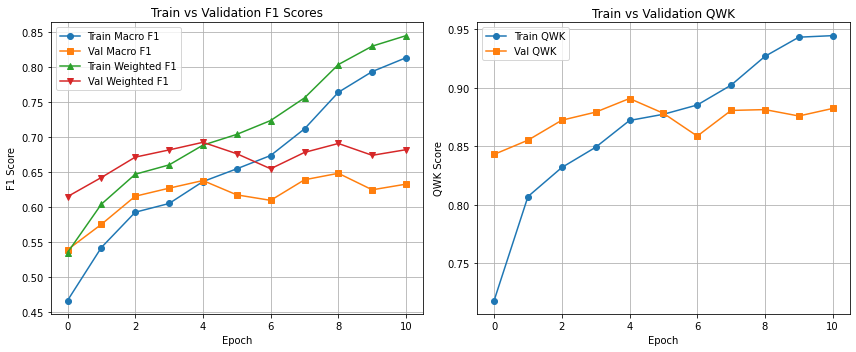

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Macro & Weighted F1
axes[0].plot(train_df["epoch"], train_df["macro_f1"], label="Train Macro F1", marker="o")
axes[0].plot(val_df["epoch"], val_df["macro_f1"], label="Val Macro F1", marker="s")
axes[0].plot(train_df["epoch"], train_df["weighted_f1"], label="Train Weighted F1", marker="^")
axes[0].plot(val_df["epoch"], val_df["weighted_f1"], label="Val Weighted F1", marker="v")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("F1 Score")
axes[0].set_title("Train vs Validation F1 Scores")
axes[0].legend()
axes[0].grid()

# Plot Quadratic Weighted Kappa
axes[1].plot(train_df["epoch"], train_df["qwk"], label="Train QWK", marker="o")
axes[1].plot(val_df["epoch"], val_df["qwk"], label="Val QWK", marker="s")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("QWK Score")
axes[1].set_title("Train vs Validation QWK")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

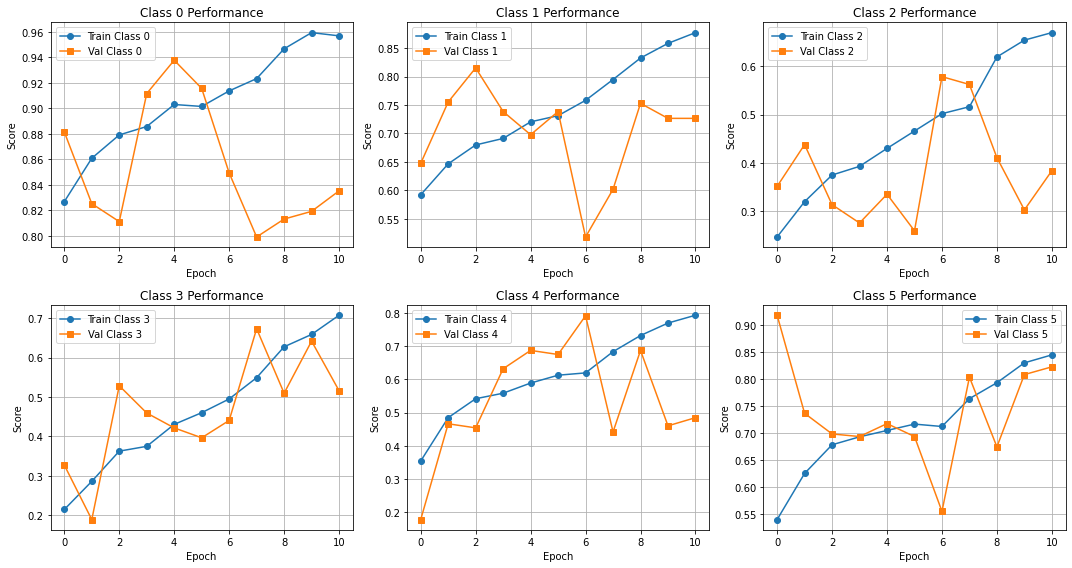

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 Rows, 3 Columns for 6 classes
axes = axes.flatten()  # Flatten for easy iteration

for i in range(6):  # Assuming classes go from class0 to class5
    axes[i].plot(train_df["epoch"], train_df[f"class{i}"], label=f"Train Class {i}", marker="o")
    axes[i].plot(val_df["epoch"], val_df[f"class{i}"], label=f"Val Class {i}", marker="s")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Score")
    axes[i].set_title(f"Class {i} Performance")
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()